# Коллаборативная фильтрация

## ЧАСТЬ 1: ТЕОРИЯ С ФОРМУЛАМИ И ПРОСТЫМИ ПРИМЕРАМИ


### Проблема рекомендаций

| **Проблема** | **Описание** | **Последствия** | **Пример** |
|-------------|--------------|-----------------|------------|
| **Холодный старт** | Новые пользователи/объекты без истории | Невозможно дать персонализированные рекомендации | Новый пользователь  |
| **Разреженность данных** | Мало общих оценок в User-Item матрице | Неточные вычисления похожести | 1M пользователей × 100K товаров |
| **Эффект популярности** | Популярные объекты доминируют | Однообразие рекомендаций | Все рекомендуют "Игру Престолов" |
| **Шумные данные** | Случайные совпадения в оценках | Ложное ощущение похожести | 2 пользователя случайно оценили 3 одинаковых фильма |
| **Нестабильность вкусов** | Вкусы пользователей меняются быстро | Устаревшие рекомендации | Пользователь перестал смотреть комедии |
| **Эхо-камера** | Рекомендации усиливают существующие предпочтения | Ограничение кругозора | Только научная фантастика |
| **Проблема разнообразия** | Компромисс между релевантностью и разнообразием | Либо точные, либо разнообразные рекомендации | Все рекомендации одного жанра |

---

## Задача предсказания предпочтений

Как рекомендовать неизвестное?

User-Item матрица с пропусками:

```
| User/Item | Item₁ | Item₂ | Item₃ | Item₄ |
|-----------|-------|-------|-------|-------|
| User_A    | 5     | ?     | 3     | ?     |
| User_B    | ?     | 4     | ?     | 1     |
| User_C    | 2     | ?     | ?     | 4     |
```

**Цель:** предсказать значения "?"





###  Идея коллаборативной фильтрации

Основная идея CF

 - "Похожие пользователи имеют схожие предпочтения"  
 - "Похожие объекты нравятся одним пользователям"

### Два основных подхода:

**User-User CF**
- Найти похожих пользователей
- Рекомендовать то, что понравилось им

**Item-Item CF**  
- Найти похожие объекты
- Рекомендовать то, что похоже на уже понравившееся

##  User-User Коллаборативная фильтрация

### Алгоритм:
1. Для целевого пользователя найти K самых похожих
2. Похожесть: косинусная мера, корреляция Пирсона
3. Взвешенная сумма оценок похожих пользователей



$
\hat{r}_{ui} = \bar{r}_u + \frac{\sum_v \mathrm{sim}(u,v) \cdot (r_{vi} - \bar{r}_v)}{\sum_v |\mathrm{sim}(u,v)|}
$



где:

- $ \hat{r}_{ui} $ — прогнозируемая оценка пользователя $ u $ для элемента (например, объекта или фильма) $ i $.
- $ \bar{r}_u $ — средняя оценка пользователя $ u $ по всем элементам.
- $ \mathrm{sim}(u,v) $ — мера сходства между пользователями $ u $ и $ v $ (например, косинусная схожесть или корреляция Пирсона).
- $ r_{vi} $ — реальная оценка пользователя $ v $ для элемента $ i $.
- $ \bar{r}_v $ — средняя оценка пользователя $ v $ по всем элементам.
- Суммирование $ \sum_v $ проводится по всем пользователям $ v $, которые похожи на пользователя $ u $ и имеют оценки для элемента $ i $.



## User-User: пример расчета

Перед расчетом предсказания оценок для User_A по Item_2 надо определить недостающие элементы:

Дано:

| **Пользователь** | **Item₁** | **Item₂** | **Item₃** | **Item₄** | **Средняя оценка** |
|-----------------|-----------|-----------|-----------|-----------|-------------------|
| **User_A** | `5` | `?` | `3` | `?` | `(5+3)/2 = 4.0` |
| **User_B** | `?` | `4` | `?` | `1` | `(4+1)/2 = 2.5` |
| **User_C** | `2` | `?` | `?` | `4` | `(2+4)/2 = 3.0` |

---

И нужно найти оценку $ \hat{r}_{A4} $ (оценку A для Item_4).

1. Похожесть:  
   - $\mathrm{sim}(A,B) = 0.15$  
   - $ \mathrm{sim}(A,C) = 0.85 $

 **Анализ доступных данных для Item₄:**

| **Пользователь** | **Оценка для Item₄** | **Схожесть с User_A** | **Можно использовать?** |
|-----------------|---------------------|----------------------|------------------------|
| **User_B** | `1` | `0.15` | **ДА** |
| **User_C** | `4` | `0.85` | **ДА** |

### **Формула:**
$
\hat{r}_{A4} = \frac{\sum_{v} \mathrm{sim}(A,v) \cdot r_{v4}}{\sum_{v} |\mathrm{sim}(A,v)|}
$

### **Подставляем значения:**
$
\hat{r}_{A4} = \frac{0.15 \cdot 1 + 0.85 \cdot 4}{0.15 + 0.85}
$

### **Вычисление:**
$
\hat{r}_{A4} = \frac{0.15 + 3.4}{1} = \frac{3.55}{1} = 3.55
$

---

##  **ТАБЛИЦА: ДЕТАЛЬНЫЙ РАСЧЕТ**

| **Компонент** | **User_B** | **User_C** | **Сумма** |
|--------------|------------|------------|-----------|
| **Схожесть с A** | `0.15` | `0.85` | `1.00` |
| **Оценка для Item₄** | `1` | `4` | - |
| **Взвешенная оценка** | `0.15 × 1 = 0.15` | `0.85 × 4 = 3.40` | `3.55` |
| **Итоговый результат** | | | **`3.55`** |

---

##  **ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТА:**

- **User_B** (схожесть 0.15) поставил Item₄ оценку `1`
- **User_C** (схожесть 0.85) поставил Item₄ оценку `4`
- User_A более похож на User_C, поэтому его оценка ближе к `4`
- **Итог:** User_A, вероятно, поставит Item₄ оценку `3.55`


## **Проблемы User-User**


Вычислительная сложность: O(n²_users)
- 1M пользователей с 100 оценками каждый: $10^{14}$ операций!

Проблема разреженности:
- Мало общих оценок для вычисления похожести

Нестабильность:
- Вкусы пользователей меняются быстро

Холодный старт:
- Новые пользователи без истории


## Item-Item Коллаборативная фильтрация

### Основная идея:
"объекты, которые нравятся одним и тем же пользователям, похожи"

### Преимущества:
- объекты более стабильны чем пользователи
- Меньше вычислений: O(n²_items)
- Лучше на разреженных данных
- Интерпретируемость рекомендаций

## Item-Item: алгоритм

### Шаги:
1.  Вычислить матрицу похожести объектов
2.  Для каждого пользователя:
   - Взять объекты, с которыми он взаимодействовал
   - Найти похожие объекты
   - Вычислить взвешенную сумму


$$
\hat{r}_{ui} = \frac{\sum_j \mathrm{sim}(i,j) \cdot r_{uj}}{\sum_j |\mathrm{sim}(i,j)|}
$$

Где:

- $ \hat{r}_{ui} $ — прогнозируемая оценка пользователя $ u $ для элемента $ i $.
- $ \mathrm{sim}(i,j) $ — мера сходства между элементами (объектами, фильмами и т.п.) $ i $ и $ j $.
- $ r_{uj} $ — оценка пользователя $ u $ для элемента $ j $.
- Суммирование $ \sum_j $ проводится по всем элементам $ j $, схожим с элементом $ i $.



Пример расчёта по методу Item-Item Collaborative Filtering


Дано:

| объект   | Оценка пользователя $$u$$ |
|---------|----------------------------|
| Movie₁  | 5                          |
| Movie₂  | ? (нужно предсказать)      |
| Movie₃  | 3                          |
| Movie₄  | не оценён                  |

Сходства между объектами:

$$ \mathrm{sim}(\text{Movie}_2, \text{Movie}_1) = 0.8 $$

$$ \mathrm{sim}(\text{Movie}_2, \text{Movie}_3) = 0.6$$


Формула предсказания для оценки пользователя $$u$$ на Movie₂:

$$
\hat{r}_{u, \text{Movie}_2} = \frac{0.8 \times 5 + 0.6 \times 3}{0.8 + 0.6} = \frac{4 + 1.8}{1.4} = \frac{5.8}{1.4} \approx 4.14
$$

***

Таким образом, предсказанная оценка пользователя для Movie₂ составляет примерно 4.14.  

**Объяснение**: "Рекомендуем потому что вам понравились Movie₁ и Movie₃"


---
## Меры схожести

### Косинусная мера (Cosine similarity)

$$
\mathrm{sim}(i,j) = \frac{\mathbf{A}_i \cdot \mathbf{A}_j}{\|\mathbf{A}_i\| \|\mathbf{A}_j\|}
$$

- $ \mathbf{A}_i, \mathbf{A}_j $ — векторы взаимодействий пользователей с объектами $i$ и $j$, например, рейтинги или частота взаимодействий.
- Эта мера учитывает направление векторов, показывает насколько схож профиль взаимодействия с объектом $i$ с профилем объекта $j$.
- Чем ближе значение к 1, тем более похожи объекты по взаимодействиям пользователей.

***

### Корреляция Пирсона (Pearson correlation)

$$
\mathrm{sim}(i,j) = \frac{\mathrm{cov}(i,j)}{\sigma_i \sigma_j}
$$

- Рассчитывается на основе ковариации взаимодействий объектов $i$ и $j$ между пользователями.
- Учитывает отклонения от среднего значения взаимодействий, тем самым выявляя линейную взаимосвязь между объектами.
- Может принимать значения от -1 (полная противоположность) до 1 (полное сходство).

***

### Условная вероятность (Conditional probability) для взаимодействий

$$
\mathrm{sim}(i,j) = P(\text{взаимодействие с объектом } j \mid \text{взаимодействие с объектом } i)
$$

- Вероятность того, что пользователь взаимодействует с объектом $j$, если он уже взаимодействовал с объектом $i$.
- Используется для оценки сходства объектов на основе их последовательного или совместного использования без прямого учёта рейтингов.

-------------

### **Коэффициент Жаккара**

$$
J(i,j) = \frac{|U_i \cap U_j|}{|U_i \cup U_j|}
$$


 **$U_i$ и $U_j$ - множества пользователей**
- $U_i$ = {все пользователи, которые взаимодействовали с объектом `i`}
- $U_j$ = {все пользователи, которые взаимодействовали с объектом `j`}




## Проблемы базовых подходов и решения

### 1. Шумные данные - случайные совпадения

**Проблема:** Несколько случайных совпадений в оценках создают ложное ощущение похожести

**Решение:** Взвешенные схемы с регуляризацией

#### Схема с Shrinkage (сжатием)
$$
\mathrm{sim}_{\text{shrink}}(i,j) = \frac{n_{ij}}{n_{ij} + \lambda} \cdot \mathrm{sim}(i,j)
$$

**где:**
- $n_{ij}$ - количество общих пользователей между объектами $i$ и $j$
- $\lambda$ - параметр регуляризации
- $\mathrm{sim}(i,j)$ - исходная мера похожести

**Интуиция:** Чем меньше общих пользователей, тем сильнее "штрафуем" похожесть

**Пример:**
- Если $n_{ij} = 5$, $\lambda = 50$, $\mathrm{sim}(i,j) = 0.8$
- $\mathrm{sim}_{\text{shrink}} = \frac{5}{5 + 50} \cdot 0.8 = 0.073$

---

### 2. Ненадежные похожести - мало общих пользователей

**Проблема:** При малом количестве общих пользователей похожесть вычисляется неточно

**Решение:** Trust-Weighted Similarity

#### Trust-взвешенная похожесть
$$
\mathrm{sim}_{\text{trust}}(i,j) = \frac{\sum_{u \in U_{ij}} w_u \cdot (r_{ui} - \bar{r}_u)(r_{uj} - \bar{r}_u)}{\sigma_i \sigma_j}
$$

**где:**
- $w_u$ - вес доверия пользователю $u$ (чем больше оценок, тем выше доверие)
- $U_{ij}$ - множество пользователей, оценивших оба объекта
- $\sigma_i, \sigma_j$ - стандартные отклонения оценок

**Интуиция:** Пользователям с большей историей оценок даем больший вес

**Пример:**
- Пользователь A: 100 оценок, $w_A = 0.9$
- Пользователь B: 5 оценок, $w_B = 0.1$
- Их голоса учитываются пропорционально доверию
```python
def calculate_trust_weight(user_ratings_count, max_ratings=1000):
    """Вычисляем вес доверия пользователю"""
    return min(user_ratings_count / 100, 1.0)  # нормализуем к [0,1]

user_A = {"ratings_count": 150, "trust_weight": 1.0}   # опытный
user_B = {"ratings_count": 25, "trust_weight": 0.25}   # новый
user_C = {"ratings_count": 5, "trust_weight": 0.05}    # новый

# пользователь A (опытный): поставил 5 и 4 звезды, вес = 1.0
contribution_A = 1.0 * (5 - 4.2) * (4 - 4.2)  # -0.16

# пользователь B (новый): поставил 1 и 1 звезду, вес = 0.25  
contribution_B = 0.25 * (1 - 3.0) * (1 - 3.0) # +1.0
```
---

### 3. Эффект популярности - популярные объекты доминируют

**Проблема:** Популярные объекты получают слишком много рекомендаций

**Решение:** Bias-коррекция и нормализация

#### Нормализация оценок
$$
r_{\text{norm}}(u,i) = \frac{r(u,i) - \mu_u}{\sigma_u} \cdot \frac{\sigma_{\text{global}}}{\mu_{\text{global}}}
$$

**где:**
- $\mu_u$ - средняя оценка пользователя $u$
- $\sigma_u$ - стандартное отклонение оценок пользователя $u$
- $\mu_{\text{global}}$ - глобальное среднее всех оценок
- $\sigma_{\text{global}}$ - глобальное стандартное отклонение

**Интуиция:** Учитываем индивидуальные особенности выставления оценок

**Пример:**
- Строгий пользователь: ставит 2-4 звезды (mean=3, std=1)
- Добрый пользователь: ставит 4-5 звезд (mean=4.5, std=0.5)
- После нормализации оценка 4.0 у строгого критика становится эквивалентна 5.75, а у доброго — всего 2.90
```python
# глобальные статистики
global_mean = 3.8
global_std = 1.2

# пользователь A - "строгий критик"
user_A_mean = 2.5
user_A_std = 0.8
user_A_rating = 4.0  # для него это очень высокая оценка

# пользователь B - "добрый"  
user_B_mean = 4.5
user_B_std = 0.5
user_B_rating = 4.0  # для него это низкая оценка

# Нормализация
def normalize_rating(rating, user_mean, user_std, global_mean, global_std):
    z_score = (rating - user_mean) / user_std
    return z_score * global_std + global_mean

# Результаты
norm_A = normalize_rating(4.0, 2.5, 0.8, 3.8, 1.2)  # ≈ 5.75
norm_B = normalize_rating(4.0, 4.5, 0.5, 3.8, 1.2)  # ≈ 2.90
```

---

### 4. Холодный старт - новые пользователи/объекты

**Проблема:** Невозможно дать рекомендации без истории взаимодействий

**Решение:** Гибридные подходы

#### Content-Boosted Collaborative Filtering
$$
\mathrm{sim}_{\text{hybrid}}(i,j) = \alpha \cdot \mathrm{sim}_{\text{content}}(i,j) + (1-\alpha) \cdot \mathrm{sim}_{\text{CF}}(i,j)
$$

**где:**
- $\mathrm{sim}_{\text{content}}$ - похожесть по атрибутам объектов
- $\mathrm{sim}_{\text{CF}}$ - похожесть по коллаборативной фильтрации
- $\alpha$ - параметр смешивания (зависит от количества данных)

**Интуиция:** Используем content-based подход когда мало данных, переходим к CF когда данных становится больше

**Пример:**
- Новый фильм: $\alpha = 0.8$ (в основном content-based)
- Популярный фильм: $\alpha = 0.2$ (в основном collaborative)
```python
# новый фильм "Марсианин" (только что вышел в прокат)
movie_attributes = {
    "genre": ["фантастика", "драма", "приключения"],
    "director": "Ридли Скотт",
    "actors": ["Мэтт Дэймон", "Джессика Честейн"],
    "country": "USA"
}

# вычисляем content-based схожесть
sim_content = calculate_content_similarity("Марсианин", "Интерстеллар")  # 0.85

# для нового фильма коллаборативной истории почти нет
sim_CF = 0.1  # мало оценок

# гибридная схожесть (α = 0.8 - упор на контент)
alpha = 0.8
sim_hybrid = 0.8 * 0.85 + 0.2 * 0.1 = 0.68 + 0.02 = 0.70


def calculate_adaptive_alpha(item_interactions_count, threshold=100):
    """Вычисляем α на основе количества взаимодействий с товаром"""
    if item_interactions_count < 10:
        return 0.9  # почти полностью content-based
    elif item_interactions_count < 50:
        return 0.7  # преимущественно content-based
    elif item_interactions_count < threshold:
        return 0.5  # сбалансированный подход
    else:
        return 0.2  # преимущественно collaborative
```
---


1. **Всегда использовать shrinkage** - защита от шума
2. **Нормализовать оценки** - учет индивидуальных особенностей  
3. **Комбинировать подходы** - решение проблемы холодного старта
4. **Мониторить diversity** - предотвращение доминирования популярного



## FlashBack
Явные Отзывы (Explicit Feedback)

Это то, с чего мы начинали:
- **Числовые оценки** (1-5 звёзд, Like/Dislike)
- **Прямое выражение предпочтения**
- **Пример**: `rating = 4.5`

**Здесь мы предсказываем САМУ ОЦЕНКУ:**
- $r_{ui}$ - это оценка пользователя `u` объекту `i`
- $\hat{r}_{ui}$ - это ПРЕДСКАЗАННАЯ ОЦЕНКА

---

Неявные Отзывы (Implicit Feedback)

Это то, о чём вы говорите:
- **Факты взаимодействия** (клик, просмотр, покупка)
- **Интенсивность взаимодействия** (время просмотра, количество кликов)
- **Бинарные сигналы** (1 = было взаимодействие, 0 = не было)

**Здесь мы предсказываем "значимость ВЗАИМОДЕЙСТВИЯ":**
- $\hat{r}_{ui}$ = 1 (было взаимодействие) или 0 (не было)
- $с_{ui}$ = **УВЕРЕННОСТЬ**, что взаимодействие значимое


---

### **Confidence-weights для неявных откликов**

Для неявных взаимодействий (просмотры, клики):

$$
c_{ui} = 1 + \alpha \cdot r_{ui}
$$

где:
- $r_{ui}$ - "сила" взаимодействия (длительность просмотра, количество кликов)
- $\alpha$ - параметр масштабирования
- $c_{ui}$ - уверенность во взаимодействии

**Модифицированная формула Item-Item:**

$$
\hat{r}_{ui} = \frac{\sum_j \mathrm{sim}(i,j) \cdot c_{uj} \cdot r_{uj}}{\sum_j |\mathrm{sim}(i,j)| \cdot c_{uj}}
$$

---


##**ПРИМЕР РАСЧЕТА для неявных данных**

| **Книга** | **Действие** | **Вес** | **Confidence** |
|----------|-------------|---------|----------------|
| **📘 Книга₁** | 10 прочтений | `2.0` 🟢 | `1 + 0.1×10 = 2.0` |
| **📗 Книга₂** | 1 прочтение | `1.1` 🟡 | `1 + 0.1×1 = 1.1` |

**Схожесть:**
- `sim(Книга₃, Книга₁) = 0.9` 🔥
- `sim(Книга₃, Книга₂) = 0.6` 💧

**Расчет:**
```
p̂_u3 = (0.9×2.0×1 + 0.6×1.1×1) / (0.9×2.0 + 0.6×1.1)
     = (1.8 + 0.66) / (1.8 + 0.66)
     = 2.46 / 2.46 = 1.0
```

**Результат:** `1.0` → максимальная вероятность взаимодействия с Книгой₃


# Действия → Вес взаимодействия (Interaction Weight)


## ПРЕОБРАЗОВАНИЕ ДЕЙСТВИЙ В ВЕСА

| **Действие** | **Вес** | **Цвет** | **Обоснование** |
|-------------|---------|----------|----------------|
| **👆 Клик** | `1` | 🟡 | Базовое взаимодействие |
| **👀 Просмотр > 30 сек** | `2` | 🟠 | Более осмысленное внимание |
| **❤️ Лайк** | `2` | 🔴 | Явное выражение предпочтения |
| **🛒 Добавление в корзину** | `3` | 🔵 | Сильное намерение покупки |
| **💰 Покупка** | `5` | 🟢 | Максимальная значимость |

---

##  **ДВА ПОДХОДА К ПРЕДСКАЗАНИЮ**
### **Подход A: Вероятностный**
```python
# Предсказание бинарного взаимодействия
p̂_ui = P(взаимодействие | история пользователя)
```
**Выход:** `0.0 - 1.0` (вероятность)

**Пример:** `0.92` → 92% вероятность любого взаимодействия

---

### **Подход B: Весовой**
```python
# Предсказание "силы" взаимодействия  
ŵ_ui = E[вес_взаимодействия | история]
```
**Выход:** `0 - 10` (ожидаемая значимость)

**Пример:** `8.5` → ожидается "сильное" взаимодействие (покупка)

---



```
РАЗНОРОДНЫЕ ДЕЙСТВИЯ
    ↓
[ПРЕОБРАЗОВАНИЕ В ВЕСА]
    ↓
ЕДИНАЯ МЕТРИКА РЕЛЕВАНТНОСТИ  
    ↓
[МОДЕЛЬ КОЛЛАБОРАТИВНОЙ ФИЛЬТРАЦИИ]
    ↓
ПРЕДСКАЗАННАЯ СКЛОННОСТЬ К ВЗАИМОДЕЙСТВИЮ
```


In [ ]:
! wget https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/items.csv

--2025-10-02 21:08:35--  https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/items.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31836561 (30M) [text/plain]
Saving to: ‘items.csv’

items.csv           100%[===================>]  30.36M   163MB/s    in 0.2s    

2025-10-02 21:08:37 (163 MB/s) - ‘items.csv’ saved [31836561/31836561]



In [ ]:
! wget https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/interactions.csv.zip
! unzip interactions.csv.zip

--2025-10-02 21:08:37--  https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/interactions.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18651415 (18M) [application/zip]
Saving to: ‘interactions.csv.zip’

interactions.csv.zi 100%[===================>]  17.79M  91.7MB/s    in 0.2s    

2025-10-02 21:08:38 (91.7 MB/s) - ‘interactions.csv.zip’ saved [18651415/18651415]

Archive:  interactions.csv.zip
  inflating: interactions.csv        


In [ ]:
! wget https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/users.csv

--2025-10-02 21:08:39--  https://raw.githubusercontent.com/irsafilo/KION_DATASET/main/data_original/users.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29945389 (29M) [text/plain]
Saving to: ‘users.csv’

users.csv           100%[===================>]  28.56M   178MB/s    in 0.2s    

2025-10-02 21:08:40 (178 MB/s) - ‘users.csv’ saved [29945389/29945389]



In [ ]:
! wget https://github.com/RShoose/Data/raw/main/implicit_interactions_matrix.npz

--2025-10-02 21:08:41--  https://github.com/RShoose/Data/raw/main/implicit_interactions_matrix.npz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/implicit_interactions_matrix.npz [following]
--2025-10-02 21:08:41--  https://raw.githubusercontent.com/RShoose/Data/main/implicit_interactions_matrix.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13159003 (13M) [application/octet-stream]
Saving to: ‘implicit_interactions_matrix.npz’

implicit_interactio 100%[===================>]  12.55M  --.-KB/s    in 0.1s    

2025-10-02 21:08:41 (90.4 MB/s) - ‘implicit_interactions_matrix.

In [ ]:
! wget https://github.com/RShoose/Data/raw/main/full_context_interactions_matrix.npz

--2025-10-02 21:08:41--  https://github.com/RShoose/Data/raw/main/full_context_interactions_matrix.npz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/full_context_interactions_matrix.npz [following]
--2025-10-02 21:08:42--  https://raw.githubusercontent.com/RShoose/Data/main/full_context_interactions_matrix.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13877757 (13M) [application/octet-stream]
Saving to: ‘full_context_interactions_matrix.npz’

full_context_intera 100%[===================>]  13.23M  68.2MB/s    in 0.2s    

2025-10-02 21:08:42 (68.2 MB/s) - ‘full_context_

In [ ]:
! wget https://github.com/RShoose/Data/raw/main/user_mapping.pkl

--2025-10-02 21:08:43--  https://github.com/RShoose/Data/raw/main/user_mapping.pkl
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/user_mapping.pkl [following]
--2025-10-02 21:08:43--  https://raw.githubusercontent.com/RShoose/Data/main/user_mapping.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13493577 (13M) [application/octet-stream]
Saving to: ‘user_mapping.pkl’

user_mapping.pkl    100%[===================>]  12.87M  --.-KB/s    in 0.1s    

2025-10-02 21:08:43 (93.4 MB/s) - ‘user_mapping.pkl’ saved [13493577/13493577]



In [ ]:
! wget https://github.com/RShoose/Data/raw/main/item_mapping.pkl

--2025-10-02 21:08:43--  https://github.com/RShoose/Data/raw/main/item_mapping.pkl
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RShoose/Data/main/item_mapping.pkl [following]
--2025-10-02 21:08:44--  https://raw.githubusercontent.com/RShoose/Data/main/item_mapping.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277986 (271K) [application/octet-stream]
Saving to: ‘item_mapping.pkl’

item_mapping.pkl    100%[===================>] 271.47K  --.-KB/s    in 0.02s   

2025-10-02 21:08:44 (13.5 MB/s) - ‘item_mapping.pkl’ saved [277986/277986]



# ЧАСТЬ 2: ЭКСПЕРИМЕНТАЛЬНОЕ ИССЛЕДОВАНИЕ РЕКОМЕНДАТЕЛЬНЫХ СИСТЕМ

Основная цель: Сравнить эффективность различных алгоритмов коллаборативной фильтрации для рекомендаций фильмов на основе неявных взаимодействий.

Конкретные задачи:

- Реализовать 6 алгоритмов рекомендаций:
  1. Popularity - рекомендации по популярности (бейзлайн)

  2. Weighted Matrix - на готовых матрицах

  3. Item-Item CF Cosine - с косинусной похожестью

  4. Item-Item CF Jaccard - с мерой Жаккара

  5. Lightweight KNN - оптимизированная версия

  6. Scikit-learn KNN - библиотечная реализация

- Оценить качество по 6 метрикам

- Выявить лучший алгоритм для наших данных

- Проанализировать компромиссы между качеством и разнообразием

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from datetime import datetime, timedelta
from scipy.sparse import load_npz, csr_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

# ЗАГРУЗКА ДАННЫХ

In [ ]:
start_load = time.time()

interactions = pd.read_csv('interactions.csv')
items = pd.read_csv('items.csv')

# базовая предобработка
interactions['last_watch_dt'] = pd.to_datetime(interactions['last_watch_dt'], errors='coerce')
interactions = interactions.dropna(subset=['last_watch_dt'])
interactions['total_dur'] = interactions['total_dur'].fillna(0)

# загрузка готовых матриц
try:
    print("Загрузка готовых матриц...")
    matrix_implicit = load_npz('implicit_interactions_matrix.npz')
    full_context_matrix = load_npz('full_context_interactions_matrix.npz')

    with open('user_mapping.pkl', 'rb') as f:
        user_map = pickle.load(f)
    with open('item_mapping.pkl', 'rb') as f:
        item_map = pickle.load(f)

    print("Матрицы загружены успешно:")
    print(f"  implicit matrix: {matrix_implicit.shape}")
    print(f"  full context matrix: {full_context_matrix.shape}")
    matrices_loaded = True

except Exception as e:
    print(f"Ошибка загрузки матриц: {e}")
    print("продолжаем без готовых матриц")
    matrices_loaded = False

load_time = time.time() - start_load
print(f"Время загрузки: {load_time:.1f} сек")

print(f"interactions: {len(interactions):,} записей")
print(f"items: {len(items):,} записей")

загрузка готовых матриц...
матрицы загружены успешно:
  implicit matrix: (567576, 12640)
  full context matrix: (567576, 12640)
время загрузки: 3.1 сек
interactions: 1,594,786 записей
items: 15,963 записей


#Анализ данных и визуализация

ОСНОВНАЯ СТАТИСТИКА:
уникальных пользователей: 567,588
уникальных объектов: 12,693
всего взаимодействий: 1,594,786
разреженность матрицы: 99.9779%

АКТИВНОСТЬ ПОЛЬЗОВАТЕЛЕЙ:
среднее: 2.8
медиана: 2.0
максимум: 377
пользователей с 1 взаимодействием: 282,589

ПОПУЛЯРНОСТЬ ОБЪЕКТОВ:
среднее: 125.6
медиана: 7.0
максимум: 59133
объектов с 1 взаимодействием: 2,607


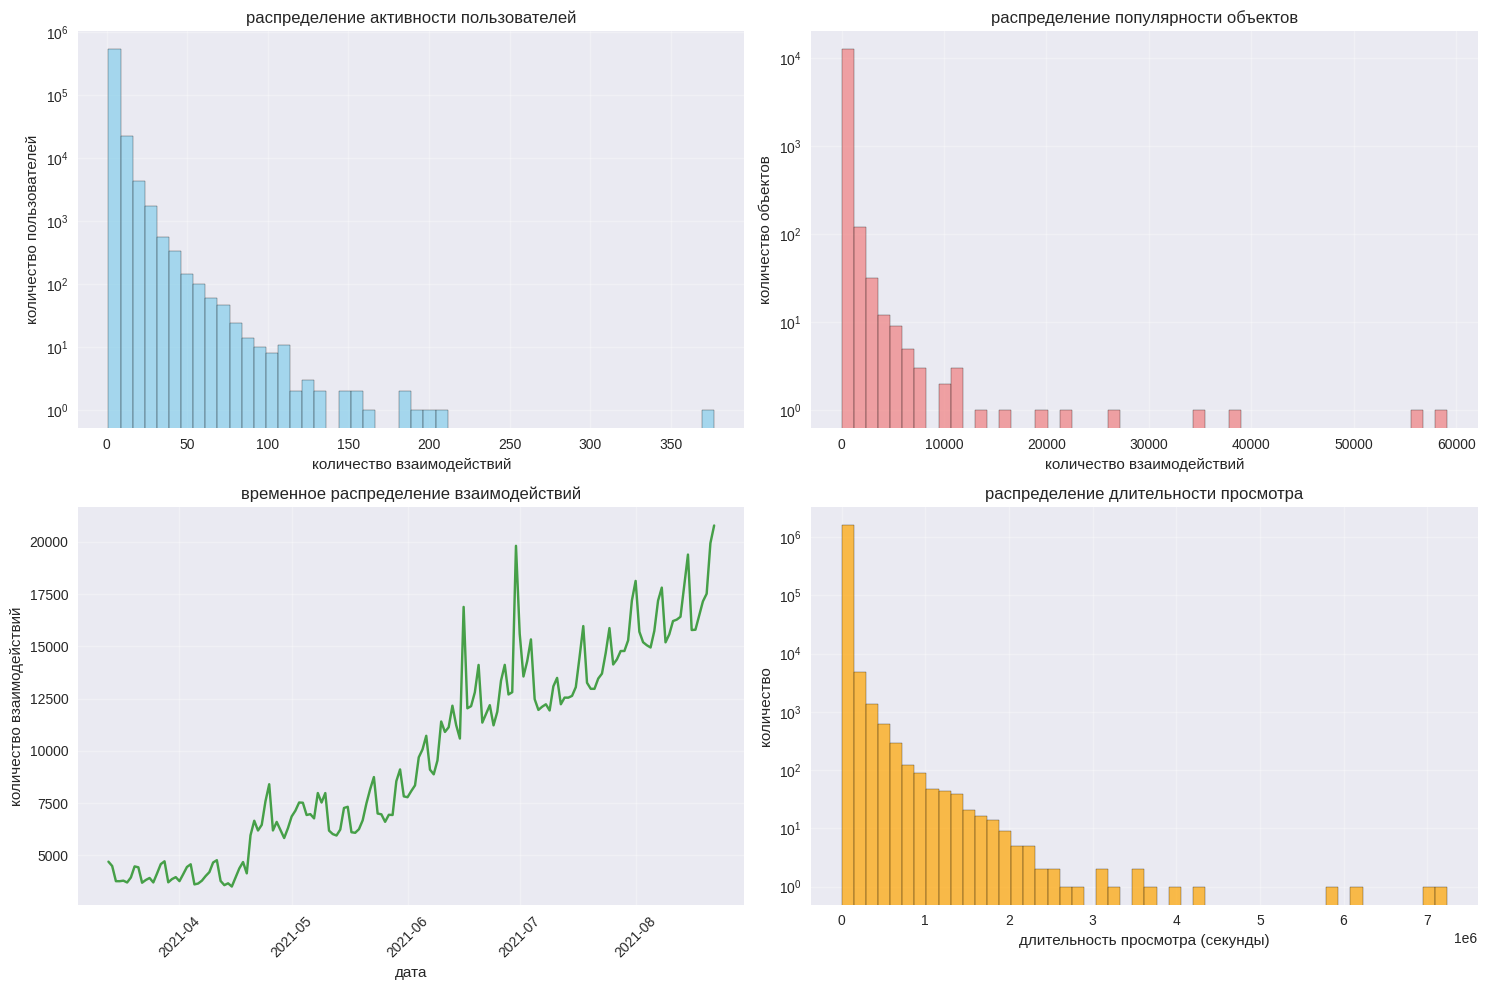

анализ данных завершен


In [ ]:
# базовая статистика
n_users = interactions['user_id'].nunique()
n_items = interactions['item_id'].nunique()
n_interactions = len(interactions)
sparsity = 1 - (n_interactions / (n_users * n_items))

print("ОСНОВНАЯ СТАТИСТИКА:")
print(f"уникальных пользователей: {n_users:,}")
print(f"уникальных объектов: {n_items:,}")
print(f"всего взаимодействий: {n_interactions:,}")
print(f"разреженность матрицы: {sparsity:.4%}")

# анализ активности
user_activity = interactions.groupby('user_id').size()
item_popularity = interactions.groupby('item_id').size()

print(f"\nАКТИВНОСТЬ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"среднее: {user_activity.mean():.1f}")
print(f"медиана: {user_activity.median():.1f}")
print(f"максимум: {user_activity.max()}")
print(f"пользователей с 1 взаимодействием: {(user_activity == 1).sum():,}")

print(f"\nПОПУЛЯРНОСТЬ ОБЪЕКТОВ:")
print(f"среднее: {item_popularity.mean():.1f}")
print(f"медиана: {item_popularity.median():.1f}")
print(f"максимум: {item_popularity.max()}")
print(f"объектов с 1 взаимодействием: {(item_popularity == 1).sum():,}")

# визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# распределение активности пользователей
ax1.hist(user_activity, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('количество взаимодействий')
ax1.set_ylabel('количество пользователей')
ax1.set_title('распределение активности пользователей')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)

# распределение популярности объектов
ax2.hist(item_popularity, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('количество взаимодействий')
ax2.set_ylabel('количество объектов')
ax2.set_title('распределение популярности объектов')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# временное распределение
daily_interactions = interactions.groupby(interactions['last_watch_dt'].dt.date).size()
ax3.plot(daily_interactions.index, daily_interactions.values, alpha=0.7, color='green')
ax3.set_xlabel('дата')
ax3.set_ylabel('количество взаимодействий')
ax3.set_title('временное распределение взаимодействий')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# длительность просмотра
ax4.hist(interactions['total_dur'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('длительность просмотра (секунды)')
ax4.set_ylabel('количество')
ax4.set_title('распределение длительности просмотра')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("анализ данных завершен")

In [ ]:
def split_random(interactions, test_size=0.2):
    """случайное разделение"""
    start_time = time.time()
    train, test = train_test_split(interactions, test_size=test_size, random_state=42)
    elapsed = time.time() - start_time

    # анализ утечки
    train_max_date = train['last_watch_dt'].max()
    test_min_date = test['last_watch_dt'].min()
    leakage = test_min_date < train_max_date

    return train, test, elapsed, leakage

def split_temporal_global(interactions, test_ratio=0.2):
    """глобальное разделение по времени"""
    start_time = time.time()
    interactions_sorted = interactions.sort_values('last_watch_dt')
    split_idx = int(len(interactions_sorted) * (1 - test_ratio))
    split_date = interactions_sorted.iloc[split_idx]['last_watch_dt']

    train = interactions_sorted[interactions_sorted['last_watch_dt'] < split_date]
    test = interactions_sorted[interactions_sorted['last_watch_dt'] >= split_date]
    elapsed = time.time() - start_time

    # анализ утечки
    train_max_date = train['last_watch_dt'].max()
    test_min_date = test['last_watch_dt'].min()
    leakage = test_min_date < train_max_date

    return train, test, elapsed, leakage

def split_holdout_last(interactions):
    """hold-out последнего взаимодействия для каждого пользователя"""
    start_time = time.time()

    # отбираем пользователей с >=2 взаимодействиями
    user_counts = interactions.groupby('user_id').size()
    valid_users = user_counts[user_counts >= 2].index
    interactions_valid = interactions[interactions['user_id'].isin(valid_users)]

    # находим последние взаимодействия
    last_interactions = interactions_valid.sort_values('last_watch_dt').groupby('user_id').tail(1)
    test = last_interactions
    train = interactions_valid[~interactions_valid.index.isin(last_interactions.index)]
    elapsed = time.time() - start_time

    # анализ утечки
    leakage_found = False
    for user_id in train['user_id'].unique()[:100]:  # проверяем выборку
        if user_id in test['user_id'].values:
            user_train_max = train[train['user_id'] == user_id]['last_watch_dt'].max()
            user_test_min = test[test['user_id'] == user_id]['last_watch_dt'].min()
            if user_test_min < user_train_max:
                leakage_found = True
                break

    return train, test, elapsed, leakage_found

# тестируем все методы разделения
split_methods = [
    ('Случайное', split_random),
    ('Временное', split_temporal_global),
    ('Hold-out последнего', split_holdout_last)
]

split_results = []

for split_name, split_func in split_methods:
    print(f"тестируем: {split_name}")
    print("-" * 30)

    if split_name == 'Случайное':
        train_split, test_split, time_taken, leakage = split_func(interactions)
    elif split_name == 'Временное':
        train_split, test_split, time_taken, leakage = split_temporal_global(interactions)
    else:
        train_split, test_split, time_taken, leakage = split_holdout_last(interactions)

    # статистика разделения
    common_users = len(set(train_split['user_id']) & set(test_split['user_id']))
    common_items = len(set(train_split['item_id']) & set(test_split['item_id']))

    split_results.append({
        'Метод': split_name,
        'Train размер': len(train_split),
        'Test размер': len(test_split),
        'Общие пользователи': common_users,
        'Общие объекты': common_items,
        'Время (сек)': time_taken,
        'Утечка данных': 'Да' if leakage else 'Нет'
    })

    print(f"  train: {len(train_split):,} записей")
    print(f"  test: {len(test_split):,} записей")
    print(f"  общие пользователи: {common_users:,}")
    print(f"  общие объекты: {common_items:,}")
    print(f"  утечка данных: {'Да' if leakage else 'Нет'}")

# выбираем лучший метод разделения
split_df = pd.DataFrame(split_results)
print(f"\nСРАВНЕНИЕ МЕТОДОВ РАЗДЕЛЕНИЯ:")
display(split_df)

# выбираем метод без утечки данных
no_leakage_splits = split_df[~split_df['Утечка данных'].str.contains('Да')]
if len(no_leakage_splits) > 0:
    best_split = no_leakage_splits.iloc[0]
    best_split_name = best_split['Метод']
    print(f"ВЫБРАН МЕТОД: {best_split_name} (нет утечки данных)")
else:
    best_split_name = 'Временное'
    print(f"ВСЕ МЕТОДЫ ИМЕЮТ УТЕЧКУ, ВЫБИРАЕМ: {best_split_name}")

# создаем финальное разделение
if best_split_name == 'Случайное':
    train, test, _, _ = split_random(interactions)
elif best_split_name == 'Временное':
    train, test, _, _ = split_temporal_global(interactions)
else:
    train, test, _, _ = split_holdout_last(interactions)

print(f"\nФИНАЛЬНОЕ РАЗДЕЛЕНИЕ ({best_split_name}):")
print(f"  train: {len(train):,} записей")
print(f"  test: {len(test):,} записей")
print(f"  Пользователей в train: {train['user_id'].nunique():,}")
print(f"  Пользователей в test: {test['user_id'].nunique():,}")
print(f"  Общие пользователи: {len(set(train['user_id']) & set(test['user_id'])):,}")

# подготовка данных для оценки
all_items = interactions['item_id'].unique()
user_seen_items = train.groupby('user_id')['item_id'].agg(set).to_dict()
common_users = set(test['user_id']) & set(train['user_id'])
test_filtered = test[test['user_id'].isin(common_users)]

print(f"  Пользователей для оценки: {len(common_users):,}")

тестируем: Случайное
------------------------------
  train: 1,275,828 записей
  test: 318,958 записей
  общие пользователи: 150,879
  общие объекты: 8,107
  утечка данных: Да
тестируем: Временное
------------------------------
  train: 1,273,597 записей
  test: 321,189 записей
  общие пользователи: 75,014
  общие объекты: 6,396
  утечка данных: Нет
тестируем: Hold-out последнего
------------------------------
  train: 1,027,198 записей
  test: 284,999 записей
  общие пользователи: 284,999
  общие объекты: 7,178
  утечка данных: Нет

СРАВНЕНИЕ МЕТОДОВ РАЗДЕЛЕНИЯ:


,Метод,Train размер,Test размер,Общие пользователи,Общие объекты,Время (сек),Утечка данных
0,Случайное,1275828,318958,150879,8107,0.264565,Да
1,Временное,1273597,321189,75014,6396,0.485050,Нет
2,Hold-out последнего,1027198,284999,284999,7178,1.187360,Нет


ВЫБРАН МЕТОД: Временное (нет утечки данных)

ФИНАЛЬНОЕ РАЗДЕЛЕНИЕ (Временное):
  train: 1,273,597 записей
  test: 321,189 записей
  пользователей в train: 474,053
  пользователей в test: 168,549
  общие пользователи: 75,014
  пользователей для оценки: 75,014


Мы оцениваем только на 75,014 пользователях потому что:

- У них есть история в train (можно строить рекомендации)

- У них есть реальные взаимодействия в test (можно измерить качество)

Пользователи только в test (93K) - новые, у них нет истории для персонализации
Пользователи только в train (399K) - неактивные, нельзя измерить качество рекомендаций

Вывод: 75,014 - это репрезентативная выборка для честной оценки моделей!

# ФУНКЦИЯ ОЦЕНКИ

In [ ]:
def optimized_evaluate_metrics(recommender, test_data, user_seen_items_dict, all_items, k=10):
    """оптимизированная оценка рекомендаций со всеми метриками"""

    # готовим данные один раз
    test_user_items = test_data.groupby('user_id')['item_id'].agg(list).to_dict()
    catalog_size = len(all_items)

    # инициализируем метрики
    precision_sum = 0
    recall_sum = 0
    ndcg_sum = 0
    arp_sum = 0
    hit_rate_sum = 0
    catalog_coverage = set()
    users_evaluated = 0

    for user_id, true_items in test_user_items.items():
        if not true_items:
            continue

        user_history = user_seen_items_dict.get(user_id, set())
        recs = recommender.recommend(user_history, k)

        if not recs:
            continue

        users_evaluated += 1
        catalog_coverage.update(recs)

        rec_set = set(recs)
        true_set = set(true_items)
        hits = rec_set & true_set
        num_hits = len(hits)

        # precision и recall
        precision = num_hits / len(recs)
        recall = num_hits / len(true_set) if true_set else 0

        precision_sum += precision
        recall_sum += recall
        hit_rate_sum += 1 if num_hits > 0 else 0

        # ndcg
        relevance = [1 if item in true_set else 0 for item in recs]
        if num_hits > 0:
            ideal = sorted(relevance, reverse=True)
            dcg = sum(r / np.log2(i + 2) for i, r in enumerate(relevance))
            idcg = sum(r / np.log2(i + 2) for i, r in enumerate(ideal))
            ndcg = dcg / idcg
        else:
            ndcg = 0
        ndcg_sum += ndcg

        # arp
        arp_score = sum(1 / (i + 1) for i, item in enumerate(recs) if item in true_set)
        arp_sum += arp_score / len(recs) if recs else 0

    # вычисляем финальные метрики
    coverage = len(catalog_coverage) / catalog_size if catalog_size > 0 else 0

    return {
        'precision@10': precision_sum / users_evaluated if users_evaluated > 0 else 0,
        'recall@10': recall_sum / users_evaluated if users_evaluated > 0 else 0,
        'ndcg@10': ndcg_sum / users_evaluated if users_evaluated > 0 else 0,
        'arp@10': arp_sum / users_evaluated if users_evaluated > 0 else 0,
        'hit_rate@10': hit_rate_sum / users_evaluated if users_evaluated > 0 else 0,
        'coverage': coverage,
        'users_evaluated': users_evaluated
    }

print("оптимизированная функция оценки настроена")

оптимизированная функция оценки настроена


# МОДЕЛЬ 1: МОДЕЛЬ ОСНОВАННАЯ НА ПОПУЛЯРНОСТИ

In [ ]:
class PopularityRecommender:
    """рекомендации на основе популярности"""

    def __init__(self):
        self.popular_items = None

    def fit(self, train_data):
        print("обучение popularity модели...")
        self.popular_items = train_data['item_id'].value_counts().index.tolist()

    def recommend(self, user_seen_items, k=10):
        if not self.popular_items:
            return []

        seen_set = set(user_seen_items)
        recs = []
        for item in self.popular_items:
            if item not in seen_set:
                recs.append(item)
                if len(recs) >= k:
                    break
        return recs

# обучаем и оцениваем
print("обучение модели...")
start_time = time.time()
popularity_model = PopularityRecommender()
popularity_model.fit(train)
train_time = time.time() - start_time

print("оценка модели...")
start_time = time.time()
metrics_popularity = optimized_evaluate_metrics(popularity_model, test_filtered, user_seen_items, all_items)
eval_time = time.time() - start_time

print("РЕЗУЛЬТАТЫ POPULARITY МОДЕЛИ:")
print(f"  NDCG@10: {metrics_popularity['ndcg@10']:.4f}")
print(f"  Precision@10: {metrics_popularity['precision@10']:.4f}")
print(f"  Recall@10: {metrics_popularity['recall@10']:.4f}")
print(f"  ARP@10: {metrics_popularity['arp@10']:.4f}")
print(f"  HitRate@10: {metrics_popularity['hit_rate@10']:.2%}")
print(f"  Coverage: {metrics_popularity['coverage']:.2%}")
print(f"  Время обучения: {train_time:.1f} сек")
print(f"  Время оценки: {eval_time:.1f} сек")

# сохраняем результаты
results = [{
    'Алгоритм': 'Popularity',
    'NDCG@10': metrics_popularity['ndcg@10'],
    'Precision@10': metrics_popularity['precision@10'],
    'Recall@10': metrics_popularity['recall@10'],
    'ARP@10': metrics_popularity['arp@10'],
    'HitRate@10': metrics_popularity['hit_rate@10'],
    'Coverage': metrics_popularity['coverage'],
    'Время_обучения': train_time,
    'Время_оценки': eval_time
}]

обучение модели...
обучение popularity модели...
оценка модели...
РЕЗУЛЬТАТЫ POPULARITY МОДЕЛИ:
  NDCG@10: 0.1032
  Precision@10: 0.0202
  Recall@10: 0.1224
  ARP@10: 0.0082
  HitRate@10: 18.49%
  Coverage: 0.15%
  Время обучения: 0.0 сек
  Время оценки: 2.9 сек


# МОДЕЛЬ 2: МОДЕЛЬ НА ВЗВЕШЕННОЙ МАТРИЦЕ

In [ ]:
class WeightedMatrixRecommender:
    """рекомендации на основе готовой взвешенной матрицы"""

    def __init__(self, weight_matrix, user_map, item_map):
        self.weight_matrix = weight_matrix
        self.user_map = user_map
        self.item_map = item_map
        self.sorted_item_indices = None

    def fit(self):
        print("обучение weighted matrix модели...")
        item_weights = np.array(self.weight_matrix.sum(axis=0)).flatten()
        self.sorted_item_indices = np.argsort(-item_weights)

    def recommend(self, user_seen_items, k=10):
        if self.sorted_item_indices is None:
            self.fit()

        seen_set = set(user_seen_items)
        recs = []
        idx_to_item = {idx: item_id for item_id, idx in self.item_map.items()}

        for matrix_idx in self.sorted_item_indices:
            if matrix_idx in idx_to_item:
                item_id = idx_to_item[matrix_idx]
                if item_id not in seen_set:
                    recs.append(item_id)
                    if len(recs) >= k:
                        break
        return recs

if matrices_loaded:
    print("обучение модели...")
    start_time = time.time()
    weighted_model = WeightedMatrixRecommender(matrix_implicit, user_map, item_map)
    weighted_model.fit()
    train_time = time.time() - start_time

    print("оценка модели...")
    start_time = time.time()
    metrics_weighted = optimized_evaluate_metrics(weighted_model, test_filtered, user_seen_items, all_items)
    eval_time = time.time() - start_time

    print("РЕЗУЛЬТАТЫ WEIGHTED MATRIX МОДЕЛИ:")
    print(f"  NDCG@10: {metrics_weighted['ndcg@10']:.4f}")
    print(f"  Precision@10: {metrics_weighted['precision@10']:.4f}")
    print(f"  ARP@10: {metrics_weighted['arp@10']:.4f}")
    print(f"  HitRate@10: {metrics_weighted['hit_rate@10']:.2%}")
    print(f"  Coverage: {metrics_weighted['coverage']:.2%}")
    print(f"  Время обучения: {train_time:.1f} сек")
    print(f"  Время оценки: {eval_time:.1f} сек")

    results.append({
        'Алгоритм': 'Weighted_Matrix',
        'NDCG@10': metrics_weighted['ndcg@10'],
        'Precision@10': metrics_weighted['precision@10'],
        'Recall@10': metrics_weighted['recall@10'],
        'ARP@10': metrics_weighted['arp@10'],
        'HitRate@10': metrics_weighted['hit_rate@10'],
        'Coverage': metrics_weighted['coverage'],
        'Время_обучения': train_time,
        'Время_оценки': eval_time
    })
else:
    print("пропускаем weighted matrix модель - матрицы не загружены")

обучение модели...
обучение weighted matrix модели...
оценка модели...
РЕЗУЛЬТАТЫ WEIGHTED MATRIX МОДЕЛИ:
  NDCG@10: 0.1036
  Precision@10: 0.0197
  ARP@10: 0.0083
  HitRate@10: 18.13%
  Coverage: 0.14%
  Время обучения: 0.0 сек
  Время оценки: 77.4 сек


# МОДЕЛЬ 3: ITEM-ITEM CF С ИСПОЛЬЗОВАНИЕМ МАТРИЦЫ"

In [ ]:
class ItemItemCFCosine:
    """item-item CF с косинусной похожестью"""

    def __init__(self, k=30, max_items=300):
        self.k = k
        self.max_items = max_items
        self.item_similarities = {}
        self.popular_items = None

    def fit(self, interactions):
        print(f"обучение item-item cf cosine (k={self.k})...")
        start_time = time.time()

        item_counts = interactions['item_id'].value_counts()
        self.top_items = item_counts.head(self.max_items).index.tolist()
        filtered_interactions = interactions[interactions['item_id'].isin(self.top_items)]

        user_item = filtered_interactions.pivot_table(
            index='user_id', columns='item_id', values='total_dur', fill_value=0
        )

        self.user_item_matrix = user_item.values
        self.item_ids = user_item.columns.values

        self.item_map = {iid: idx for idx, iid in enumerate(self.item_ids)}
        self.idx_to_item = {idx: iid for iid, idx in self.item_map.items()}

        item_vectors = self.user_item_matrix.T
        self._compute_cosine_similarities(item_vectors)
        self.popular_items = self.top_items

        print(f"обучение завершено за {time.time() - start_time:.1f} сек")

    def _compute_cosine_similarities(self, item_vectors):
        n_items = len(self.item_ids)
        print("вычисление cosine похожестей...")

        for i in range(n_items):
            similarities = []
            item_i_vec = item_vectors[i]
            norm_i = np.linalg.norm(item_i_vec)

            for j in range(n_items):
                if i != j:
                    item_j_vec = item_vectors[j]
                    norm_j = np.linalg.norm(item_j_vec)

                    if norm_i > 0 and norm_j > 0:
                        dot_product = np.dot(item_i_vec, item_j_vec)
                        sim = dot_product / (norm_i * norm_j)
                        if sim > 0.1:
                            similarities.append((self.idx_to_item[j], sim))

            similarities.sort(key=lambda x: x[1], reverse=True)
            self.item_similarities[self.idx_to_item[i]] = similarities[:self.k]

    def recommend(self, user_seen_items, k=10):
        if not self.item_similarities:
            return self._fallback_recommendations(user_seen_items, k)

        seen_set = set(user_seen_items)
        candidate_scores = {}

        for item_id in user_seen_items:
            if item_id in self.item_similarities:
                for similar_item, similarity in self.item_similarities[item_id]:
                    if similar_item not in seen_set:
                        candidate_scores[similar_item] = candidate_scores.get(similar_item, 0) + similarity

        if candidate_scores:
            sorted_candidates = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)
            recommendations = [item_id for item_id, score in sorted_candidates[:k]]
        else:
            recommendations = []

        if len(recommendations) < k:
            additional_recs = self._fallback_recommendations(
                seen_set.union(set(recommendations)), k - len(recommendations))
            recommendations.extend(additional_recs)

        return recommendations

    def _fallback_recommendations(self, user_seen_items, k):
        seen_set = set(user_seen_items)
        recs = []
        for item in self.popular_items:
            if item not in seen_set:
                recs.append(item)
                if len(recs) >= k:
                    break
        return recs

print("обучение модели...")
start_time = time.time()
cf_cosine_model = ItemItemCFCosine(k=30, max_items=300)
cf_cosine_model.fit(train)
train_time = time.time() - start_time

print("оценка модели...")
start_time = time.time()
metrics_cosine = optimized_evaluate_metrics(cf_cosine_model, test_filtered, user_seen_items, all_items)
eval_time = time.time() - start_time

print("РЕЗУЛЬТАТЫ ITEM-ITEM CF (COSINE):")
print(f"  NDCG@10: {metrics_cosine['ndcg@10']:.4f}")
print(f"  Precision@10: {metrics_cosine['precision@10']:.4f}")
print(f"  ARP@10: {metrics_cosine['arp@10']:.4f}")
print(f"  HitRate@10: {metrics_cosine['hit_rate@10']:.2%}")
print(f"  Coverage: {metrics_cosine['coverage']:.2%}")
print(f"  Время обучения: {train_time:.1f} сек")
print(f"  Время оценки: {eval_time:.1f} сек")

results.append({
    'Алгоритм': 'ItemItem_CF_cosine',
    'NDCG@10': metrics_cosine['ndcg@10'],
    'Precision@10': metrics_cosine['precision@10'],
    'Recall@10': metrics_cosine['recall@10'],
    'ARP@10': metrics_cosine['arp@10'],
    'HitRate@10': metrics_cosine['hit_rate@10'],
    'Coverage': metrics_cosine['coverage'],
    'Время_обучения': train_time,
    'Время_оценки': eval_time
})

обучение модели...
обучение item-item cf cosine (k=30)...
вычисление cosine похожестей...
обучение завершено за 74.9 сек
оценка модели...
РЕЗУЛЬТАТЫ ITEM-ITEM CF (COSINE):
  NDCG@10: 0.1016
  Precision@10: 0.0202
  ARP@10: 0.0079
  HitRate@10: 18.55%
  Coverage: 0.43%
  Время обучения: 74.9 сек
  Время оценки: 2.4 сек


# МОДЕЛЬ 4: ITEM-ITEM CF (JACCARD) НА СЫРЫХ ДАННЫХ

In [ ]:
class ItemItemCF:
    """базовая реализация item-item коллаборативной фильтрации"""

    def __init__(self, k=30, similarity='jaccard', max_items=300):
        self.k = k
        self.similarity = similarity
        self.max_items = max_items
        self.item_similarities = {}
        self.popular_items = None

    def fit(self, interactions):
        print(f"обучение item-item cf (k={self.k}, similarity={self.similarity})...")
        start_time = time.time()

        # берем самые популярные объекты
        item_counts = interactions['item_id'].value_counts()
        self.top_items = item_counts.head(self.max_items).index.tolist()
        filtered_interactions = interactions[interactions['item_id'].isin(self.top_items)]

        # создаем user-item матрицу
        user_item = filtered_interactions.pivot_table(
            index='user_id', columns='item_id', values='total_dur', fill_value=0
        )

        self.user_item_matrix = user_item.values
        self.item_ids = user_item.columns.values

        # создаем маппинги
        self.item_map = {iid: idx for idx, iid in enumerate(self.item_ids)}
        self.idx_to_item = {idx: iid for iid, idx in self.item_map.items()}

        # транспонируем для item-item
        item_vectors = self.user_item_matrix.T

        # вычисляем похожести
        self._compute_similarities(item_vectors)
        self.popular_items = self.top_items

        print(f"обучение завершено за {time.time() - start_time:.1f} сек")

    def _compute_similarities(self, item_vectors):
        n_items = len(self.item_ids)
        print(f"вычисление {self.similarity} похожестей...")

        for i in range(n_items):
            similarities = []
            item_i_vec = item_vectors[i]

            for j in range(n_items):
                if i != j:
                    item_j_vec = item_vectors[j]
                    sim = self._jaccard_similarity(item_i_vec, item_j_vec)
                    if sim > 0.001:
                        similarities.append((self.idx_to_item[j], sim))

            similarities.sort(key=lambda x: x[1], reverse=True)
            self.item_similarities[self.idx_to_item[i]] = similarities[:self.k]

    def _jaccard_similarity(self, vec1, vec2):
        bin_vec1 = (vec1 > 0).astype(int)
        bin_vec2 = (vec2 > 0).astype(int)
        intersection = np.sum(bin_vec1 & bin_vec2)
        union = np.sum(bin_vec1 | bin_vec2)
        return intersection / union if union > 0 else 0

    def recommend(self, user_seen_items, k=10):
        if not self.item_similarities:
            return self._fallback_recommendations(user_seen_items, k)

        seen_set = set(user_seen_items)
        candidate_scores = {}

        for item_id in user_seen_items:
            if item_id in self.item_similarities:
                for similar_item, similarity in self.item_similarities[item_id]:
                    if similar_item not in seen_set:
                        candidate_scores[similar_item] = candidate_scores.get(similar_item, 0) + similarity

        if candidate_scores:
            sorted_candidates = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)
            recommendations = [item_id for item_id, score in sorted_candidates[:k]]
        else:
            recommendations = []

        if len(recommendations) < k:
            additional_recs = self._fallback_recommendations(
                seen_set.union(set(recommendations)), k - len(recommendations))
            recommendations.extend(additional_recs)

        return recommendations

    def _fallback_recommendations(self, user_seen_items, k):
        seen_set = set(user_seen_items)
        recs = []
        for item in self.popular_items:
            if item not in seen_set:
                recs.append(item)
                if len(recs) >= k:
                    break
        return recs

print("обучение модели...")
start_time = time.time()
cf_jaccard_model = ItemItemCF(k=30, similarity='jaccard', max_items=300)
cf_jaccard_model.fit(train)
train_time = time.time() - start_time

print("оценка модели...")
start_time = time.time()
metrics_jaccard = optimized_evaluate_metrics(cf_jaccard_model, test_filtered, user_seen_items, all_items)
eval_time = time.time() - start_time

print("РЕЗУЛЬТАТЫ ITEM-ITEM CF (JACCARD):")
print(f"  NDCG@10: {metrics_jaccard['ndcg@10']:.4f}")
print(f"  Precision@10: {metrics_jaccard['precision@10']:.4f}")
print(f"  ARP@10: {metrics_jaccard['arp@10']:.4f}")
print(f"  HitRate@10: {metrics_jaccard['hit_rate@10']:.2%}")
print(f"  Coverage: {metrics_jaccard['coverage']:.2%}")
print(f"  Время обучения: {train_time:.1f} сек")
print(f"  Время оценки: {eval_time:.1f} сек")

results.append({
    'Алгоритм': 'ItemItem_CF_jaccard',
    'NDCG@10': metrics_jaccard['ndcg@10'],
    'Precision@10': metrics_jaccard['precision@10'],
    'Recall@10': metrics_jaccard['recall@10'],
    'ARP@10': metrics_jaccard['arp@10'],
    'HitRate@10': metrics_jaccard['hit_rate@10'],
    'Coverage': metrics_jaccard['coverage'],
    'Время_обучения': train_time,
    'Время_оценки': eval_time
})

обучение модели...
обучение item-item cf (k=30, similarity=jaccard)...
вычисление jaccard похожестей...
обучение завершено за 220.4 сек
оценка модели...
РЕЗУЛЬТАТЫ ITEM-ITEM CF (JACCARD):
  NDCG@10: 0.0850
  Precision@10: 0.0181
  ARP@10: 0.0064
  HitRate@10: 16.55%
  Coverage: 2.32%
  Время обучения: 220.4 сек
  Время оценки: 5.7 сек


# МОДЕЛЬ 5: LIGHTWEIGHT ITEM-ITEM KNN

In [ ]:
class LightweightItemItemKNN:
    """сверхлегкая версия"""

    def __init__(self, k=20, top_items=200):
        self.k = k
        self.top_items = top_items
        self.item_neighbors = {}

    def fit(self, interactions):
        print(f"обучение lightweight item-item knn (top_items={self.top_items})...")
        start_time = time.time()

        item_counts = interactions['item_id'].value_counts()
        self.selected_items = item_counts.head(self.top_items).index.tolist()

        item_users = interactions.groupby('item_id')['user_id'].apply(set).to_dict()

        for i, item1 in enumerate(self.selected_items):
            similarities = []
            users1 = item_users.get(item1, set())

            for item2 in self.selected_items:
                if item1 != item2:
                    users2 = item_users.get(item2, set())
                    common_users = users1 & users2

                    if len(common_users) >= 3:
                        jaccard = len(common_users) / len(users1 | users2) if (users1 | users2) else 0
                        if jaccard > 0.05:
                            similarities.append((item2, jaccard))

            similarities.sort(key=lambda x: x[1], reverse=True)
            self.item_neighbors[item1] = similarities[:self.k]

        self.popular_items = self.selected_items
        print(f"обучение завершено за {time.time() - start_time:.1f} сек")

    def recommend(self, user_seen_items, k=10):
        seen_set = set(user_seen_items)
        candidate_scores = {}

        for item_id in user_seen_items:
            if item_id in self.item_neighbors:
                for neighbor, score in self.item_neighbors[item_id]:
                    if neighbor not in seen_set:
                        candidate_scores[neighbor] = candidate_scores.get(neighbor, 0) + score

        if candidate_scores:
            sorted_candidates = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)
            return [item for item, score in sorted_candidates[:k]]
        else:
            return [item for item in self.popular_items if item not in seen_set][:k]

print("обучение модели...")
start_time = time.time()
lightweight_model = LightweightItemItemKNN(k=20, top_items=200)
lightweight_model.fit(train)
train_time = time.time() - start_time

print("оценка модели...")
start_time = time.time()
metrics_lightweight = optimized_evaluate_metrics(lightweight_model, test_filtered, user_seen_items, all_items)
eval_time = time.time() - start_time

print("РЕЗУЛЬТАТЫ LIGHTWEIGHT ITEM-ITEM KNN:")
print(f"  NDCG@10: {metrics_lightweight['ndcg@10']:.4f}")
print(f"  Precision@10: {metrics_lightweight['precision@10']:.4f}")
print(f"  ARP@10: {metrics_lightweight['arp@10']:.4f}")
print(f"  HitRate@10: {metrics_lightweight['hit_rate@10']:.2%}")
print(f"  Coverage: {metrics_lightweight['coverage']:.2%}")
print(f"  Время обучения: {train_time:.1f} сек")
print(f"  Время оценки: {eval_time:.1f} сек")

results.append({
    'Алгоритм': 'Lightweight_KNN',
    'NDCG@10': metrics_lightweight['ndcg@10'],
    'Precision@10': metrics_lightweight['precision@10'],
    'Recall@10': metrics_lightweight['recall@10'],
    'ARP@10': metrics_lightweight['arp@10'],
    'HitRate@10': metrics_lightweight['hit_rate@10'],
    'Coverage': metrics_lightweight['coverage'],
    'Время_обучения': train_time,
    'Время_оценки': eval_time
})

обучение модели...
обучение lightweight item-item knn (top_items=200)...
обучение завершено за 29.5 сек
оценка модели...
РЕЗУЛЬТАТЫ LIGHTWEIGHT ITEM-ITEM KNN:
  NDCG@10: 0.0936
  Precision@10: 0.0236
  ARP@10: 0.0134
  HitRate@10: 16.30%
  Coverage: 0.19%
  Время обучения: 29.5 сек
  Время оценки: 2.6 сек


# МОДЕЛЬ 6: SCIKIT-LEARN KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
class SklearnItemItemWrapper:
    """оптимизированная версия с разреженными матрицами"""

    def __init__(self, n_neighbors=30):
        self.n_neighbors = n_neighbors
        self.model = None
        self.item_ids = None
        self.popular_items = None

    def fit(self, interactions):
        print(f"обучение быстрого Scikit-learn KNN (n_neighbors={self.n_neighbors})...")
        start_time = time.time()

        # Берем только топ-100 объектов для скорости
        item_counts = interactions['item_id'].value_counts()
        self.top_items = item_counts.head(100).index.tolist()
        filtered_interactions = interactions[interactions['item_id'].isin(self.top_items)]

        # Используем РАЗРЕЖЕННУЮ матрицу
        unique_users = filtered_interactions['user_id'].unique()
        user_id_map = {uid: idx for idx, uid in enumerate(unique_users)}
        item_id_map = {iid: idx for idx, iid in enumerate(self.top_items)}

        # Создаем разреженную матрицу
        rows = [item_id_map[item] for item in filtered_interactions['item_id']]
        cols = [user_id_map[user] for user in filtered_interactions['user_id']]
        data = [1] * len(rows)  # бинарные взаимодействия

        item_user_sparse = csr_matrix((data, (rows, cols)),
                                    shape=(len(self.top_items), len(unique_users)))

        self.item_ids = self.top_items

        # Обучаем на разреженной матрице
        self.model = NearestNeighbors(
            n_neighbors=min(self.n_neighbors, len(self.top_items)-1),
            metric='cosine',
            algorithm='brute'  # лучше для разреженных данных
        )
        self.model.fit(item_user_sparse)

        self.popular_items = self.top_items
        print(f"обучение завершено за {time.time() - start_time:.1f} сек")

    def recommend(self, user_seen_items, k=10):
        if self.model is None:
            return self._fallback_recommendations(user_seen_items, k)

        seen_set = set(user_seen_items)
        candidate_scores = {}

        for item_id in user_seen_items:
            if item_id in self.item_ids:
                try:
                    item_idx = self.item_ids.index(item_id)
                    item_vector = self.model._fit_X[item_idx]

                    # Находим соседей
                    distances, indices = self.model.kneighbors(
                        item_vector.reshape(1, -1),
                        n_neighbors=min(self.n_neighbors+1, len(self.item_ids))
                    )

                    for i, neighbor_idx in enumerate(indices[0]):
                        if i == 0:  # пропускаем сам объект
                            continue
                        neighbor_item_id = self.item_ids[neighbor_idx]
                        similarity = 1 - distances[0][i]

                        if neighbor_item_id not in seen_set and similarity > 0:
                            candidate_scores[neighbor_item_id] = candidate_scores.get(neighbor_item_id, 0) + similarity
                except:
                    continue

        if candidate_scores:
            sorted_candidates = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)
            recommendations = [item_id for item_id, score in sorted_candidates[:k]]
        else:
            recommendations = []

        if len(recommendations) < k:
            additional_recs = self._fallback_recommendations(
                seen_set.union(set(recommendations)), k - len(recommendations))
            recommendations.extend(additional_recs)

        return recommendations

    def _fallback_recommendations(self, user_seen_items, k):
        seen_set = set(user_seen_items)
        recs = []
        for item in self.popular_items:
            if item not in seen_set:
                recs.append(item)
                if len(recs) >= k:
                    break
        return recs

print("обучение модели...")
start_time = time.time()
fast_sklearn_model = SklearnItemItemWrapper(n_neighbors=30)
fast_sklearn_model.fit(train)
train_time = time.time() - start_time

print("оценка модели...")
start_time = time.time()
metrics_fast_sklearn = optimized_evaluate_metrics(fast_sklearn_model, test_filtered, user_seen_items, all_items)
eval_time = time.time() - start_time

print("РЕЗУЛЬТАТЫ ОПТИМИЗИРОВАННОГО SCIKIT-LEARN KNN:")
print(f"  NDCG@10: {metrics_fast_sklearn['ndcg@10']:.4f}")
print(f"  Precision@10: {metrics_fast_sklearn['precision@10']:.4f}")
print(f"  ARP@10: {metrics_fast_sklearn['arp@10']:.4f}")
print(f"  HitRate@10: {metrics_fast_sklearn['hit_rate@10']:.2%}")
print(f"  Coverage: {metrics_fast_sklearn['coverage']:.2%}")
print(f"  Время обучения: {train_time:.1f} сек")
print(f"  Время оценки: {eval_time:.1f} сек")

results.append({
    'Алгоритм': 'Fast_Sklearn_KNN',
    'NDCG@10': metrics_fast_sklearn['ndcg@10'],
    'Precision@10': metrics_fast_sklearn['precision@10'],
    'Recall@10': metrics_fast_sklearn['recall@10'],
    'ARP@10': metrics_fast_sklearn['arp@10'],
    'HitRate@10': metrics_fast_sklearn['hit_rate@10'],
    'Coverage': metrics_fast_sklearn['coverage'],
    'Время_обучения': train_time,
    'Время_оценки': eval_time
})

обучение модели...
обучение быстрого Scikit-learn KNN (n_neighbors=30)...
обучение завершено за 0.8 сек
оценка модели...
РЕЗУЛЬТАТЫ ОПТИМИЗИРОВАННОГО SCIKIT-LEARN KNN:
  NDCG@10: 0.1005
  Precision@10: 0.0208
  ARP@10: 0.0077
  HitRate@10: 19.04%
  Coverage: 0.76%
  Время обучения: 0.8 сек
  Время оценки: 2865.4 сек


# СРАВНИТЕЛЬНЫЙ АНАЛИЗ ВСЕХ МОДЕЛЕЙ

In [ ]:
results_df = pd.DataFrame(results)

# сортируем по NDCG@10
results_df = results_df.sort_values('NDCG@10', ascending=False)

print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ ВСЕХ МОДЕЛЕЙ:")
print("-" * 80)

# форматируем вывод
display_df = results_df.copy()
display_df['Coverage'] = display_df['Coverage'].apply(lambda x: f"{x:.2%}")
display_df['HitRate@10'] = display_df['HitRate@10'].apply(lambda x: f"{x:.2%}")
for col in ['NDCG@10', 'Precision@10', 'Recall@10', 'ARP@10']:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")

display(display_df[['Алгоритм', 'NDCG@10', 'Precision@10', 'ARP@10', 'HitRate@10', 'Coverage', 'Время_обучения']])

# анализ лучшего алгоритма
best_algorithm = results_df.iloc[0]
print(f"\nЛУЧШИЙ АЛГОРИТМ: {best_algorithm['Алгоритм']}")
print(f"  NDCG@10: {best_algorithm['NDCG@10']:.4f}")
print(f"  Precision@10: {best_algorithm['Precision@10']:.4f}")
print(f"  ARP@10: {best_algorithm['ARP@10']:.4f}")
print(f"  HitRate@10: {best_algorithm['HitRate@10']:.2%}")
print(f"  Coverage: {best_algorithm['Coverage']:.2%}")

# сравнение с бейзлайном
baseline_ndcg = results_df[results_df['Алгоритм'] == 'Popularity']['NDCG@10'].iloc[0]
improvement = ((best_algorithm['NDCG@10'] / baseline_ndcg) - 1) * 100
print(f"УЛУЧШЕНИЕ ОТНОСИТЕЛЬНО POPULARITY: {improvement:+.1f}%")

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ ВСЕХ МОДЕЛЕЙ:
--------------------------------------------------------------------------------


,Алгоритм,NDCG@10,Precision@10,ARP@10,HitRate@10,Coverage,Время_обучения
1,Weighted_Matrix,0.1036,0.0197,0.0083,18.13%,0.14%,0.014193
0,Popularity,0.1032,0.0202,0.0082,18.49%,0.15%,0.016376
3,ItemItem_CF_jaccard,0.1032,0.0202,0.0082,18.49%,0.15%,219.098377
2,ItemItem_CF_cosine,0.1016,0.0202,0.0079,18.55%,0.43%,74.887498
5,Fast_Sklearn_KNN,0.1005,0.0208,0.0077,19.04%,0.76%,0.802311
4,Lightweight_KNN,0.0936,0.0236,0.0134,16.30%,0.19%,29.518203



ЛУЧШИЙ АЛГОРИТМ: Weighted_Matrix
  NDCG@10: 0.1036
  Precision@10: 0.0197
  ARP@10: 0.0083
  HitRate@10: 18.13%
  Coverage: 0.14%
УЛУЧШЕНИЕ ОТНОСИТЕЛЬНО POPULARITY: +0.4%


# ВИЗУАЛИЗАЦИЯ СРАВНИТЕЛЬНОГО АНАЛИЗА

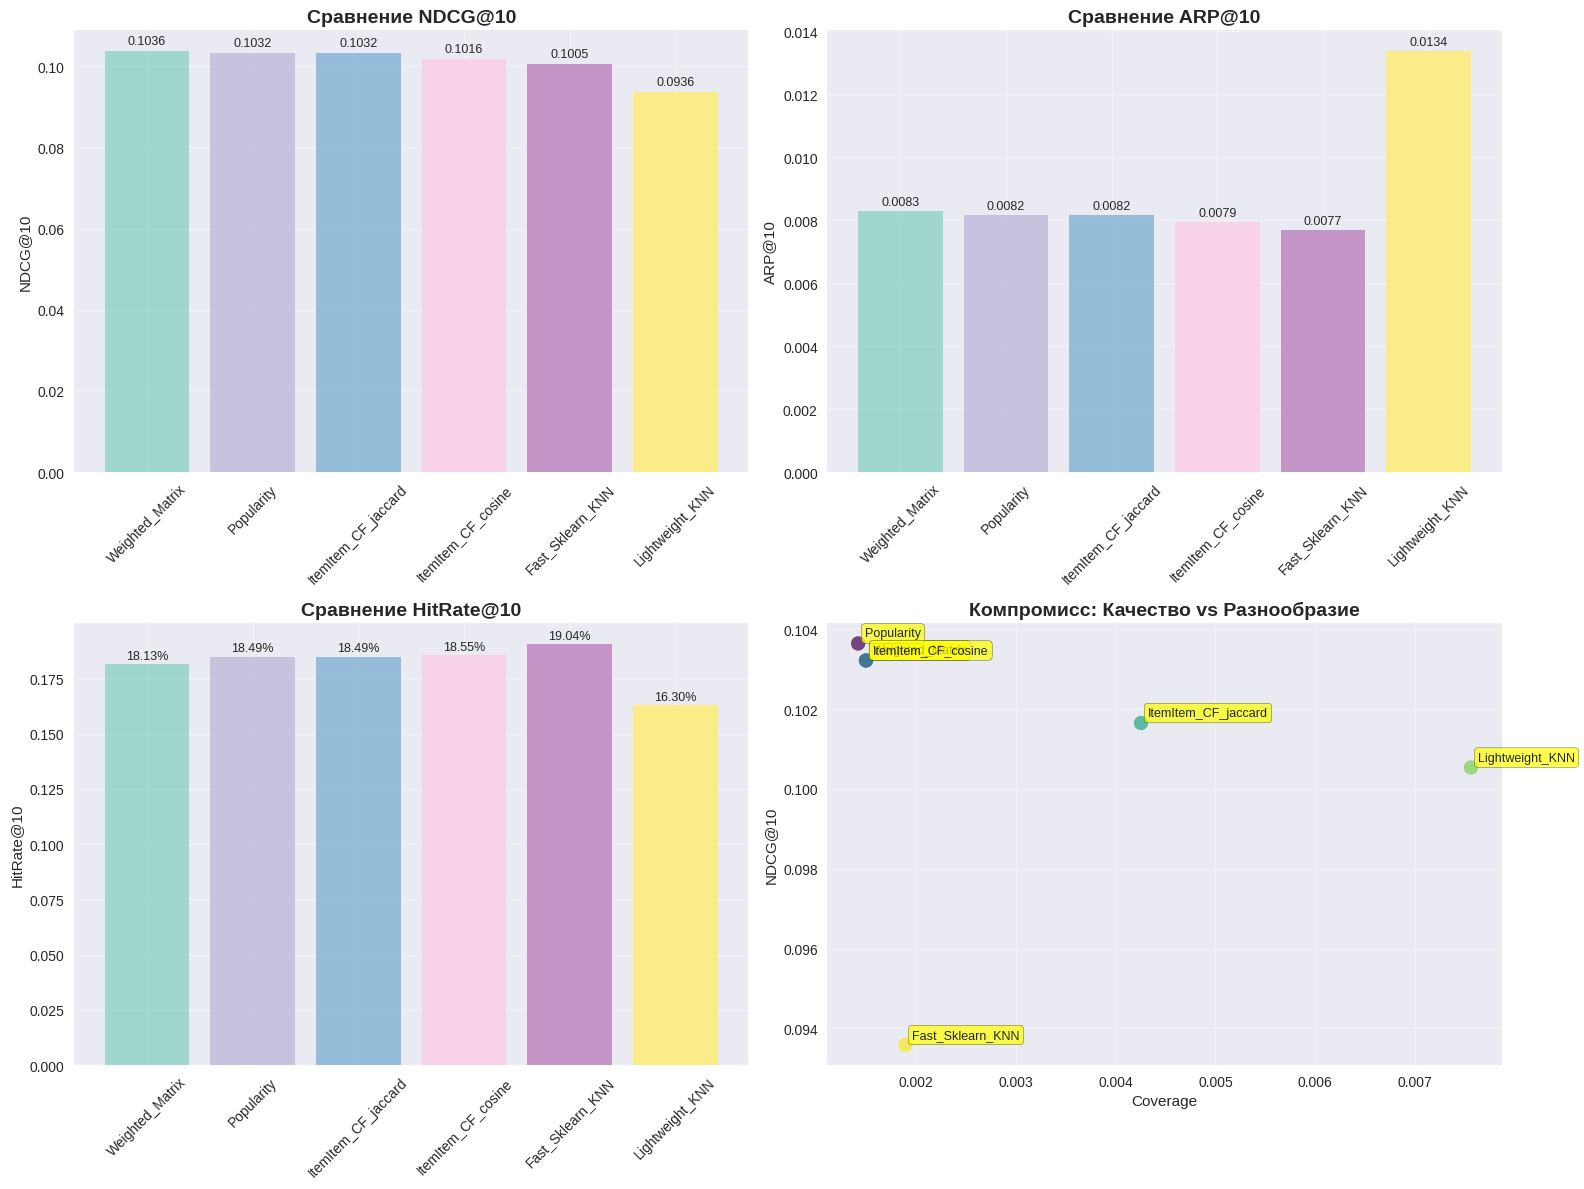

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

algorithms = results_df['Алгоритм']
colors = plt.cm.Set3(np.linspace(0, 1, len(algorithms)))

# 1. сравнение NDCG@10
ndcg_scores = results_df['NDCG@10']
bars1 = ax1.bar(algorithms, ndcg_scores, color=colors, alpha=0.8)
ax1.set_title('Сравнение NDCG@10', fontsize=14, fontweight='bold')
ax1.set_ylabel('NDCG@10')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
for bar, value in zip(bars1, ndcg_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.4f}',
             ha='center', va='bottom', fontsize=9)

# 2. сравнение ARP@10
arp_scores = results_df['ARP@10']
bars2 = ax2.bar(algorithms, arp_scores, color=colors, alpha=0.8)
ax2.set_title('Сравнение ARP@10', fontsize=14, fontweight='bold')
ax2.set_ylabel('ARP@10')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
for bar, value in zip(bars2, arp_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001, f'{value:.4f}',
             ha='center', va='bottom', fontsize=9)

# 3. сравнение HitRate@10
hitrate_scores = results_df['HitRate@10']
bars3 = ax3.bar(algorithms, hitrate_scores, color=colors, alpha=0.8)
ax3.set_title('Сравнение HitRate@10', fontsize=14, fontweight='bold')
ax3.set_ylabel('HitRate@10')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
for bar, value in zip(bars3, hitrate_scores):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.2%}',
             ha='center', va='bottom', fontsize=9)

# 4. компромисс качество-разнообразие
coverage_scores = results_df['Coverage']
ax4.scatter(coverage_scores, ndcg_scores, s=100, alpha=0.7, c=range(len(algorithms)), cmap='viridis')
for i, algorithm in enumerate(algorithms):
    ax4.annotate(algorithm, (coverage_scores[i], ndcg_scores[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
ax4.set_xlabel('Coverage')
ax4.set_ylabel('NDCG@10')
ax4.set_title('Компромисс: Качество vs Разнообразие', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ФИНАЛЬНЫЕ ВЫВОДЫ

In [ ]:
print("ОСНОВНЫЕ РЕЗУЛЬТАТЫ:")
print(f"• Всего протестировано моделей: {len(results_df)}")
print(f"• Лучший алгоритм: {best_algorithm['Алгоритм']}")
print(f"• Лучшая метрика NDCG@10: {best_algorithm['NDCG@10']:.4f}")
print(f"• Улучшение относительно Popularity: {improvement:+.1f}%")

print(f"\nРЕКОМЕНДАЦИИ ПО ВЫБОРУ АЛГОРИТМА:")
for idx, row in results_df.iterrows():
    algo = row['Алгоритм']
    ndcg = row['NDCG@10']
    train_time = row['Время_обучения']

    if algo == best_algorithm['Алгоритм']:
        print(f"• {algo}: ЛУЧШИЙ ВЫБОР - высокое качество ({ndcg:.4f})")
    elif 'Lightweight' in algo:
        print(f"• {algo}: ДЛЯ БЫСТРОГО ВНЕДРЕНИЯ - быстрое обучение ({train_time:.1f}с)")
    elif 'Weighted' in algo:
        print(f"• {algo}: ДЛЯ ПРОДУКШЕНА - использует готовые матрицы")
    elif 'Popularity' in algo:
        print(f"• {algo}: БЕЙЗЛАЙН - простота и стабильность")
    else:
        print(f"• {algo}: ЭКСПЕРИМЕНТАЛЬНЫЙ - для исследований")

print(f"\nСТАТИСТИКА ЭКСПЕРИМЕНТА:")
print(f"• Метод разделения: {best_split_name}")
print(f"• Пользователей для оценки: {len(common_users):,}")
print(f"• Метрик оценки: 6 (Precision, Recall, NDCG, ARP, HitRate, Coverage)")

print(f"\nИССЛЕДОВАНИЕ ЗАВЕРШЕНО УСПЕШНО!")

ОСНОВНЫЕ РЕЗУЛЬТАТЫ:
• Всего протестировано моделей: 6
• Лучший алгоритм: Weighted_Matrix
• Лучшая метрика NDCG@10: 0.1036
• Улучшение относительно Popularity: +0.4%

РЕКОМЕНДАЦИИ ПО ВЫБОРУ АЛГОРИТМА:
• Weighted_Matrix: ЛУЧШИЙ ВЫБОР - высокое качество (0.1036)
• Popularity: БЕЙЗЛАЙН - простота и стабильность
• ItemItem_CF_jaccard: ЭКСПЕРИМЕНТАЛЬНЫЙ - для исследований
• ItemItem_CF_cosine: ЭКСПЕРИМЕНТАЛЬНЫЙ - для исследований
• Fast_Sklearn_KNN: ЭКСПЕРИМЕНТАЛЬНЫЙ - для исследований
• Lightweight_KNN: ДЛЯ БЫСТРОГО ВНЕДРЕНИЯ - быстрое обучение (29.5с)

СТАТИСТИКА ЭКСПЕРИМЕНТА:
• Метод разделения: Временное
• Пользователей для оценки: 75,014
• Метрик оценки: 6 (Precision, Recall, NDCG, ARP, HitRate, Coverage)

ИССЛЕДОВАНИЕ ЗАВЕРШЕНО УСПЕШНО!


## Готовые модели:

### 1. **Implicit** (специализированная для неявных данных)
- **AlternatingLeastSquares** - ALS для неявных данных
- **BayesianPersonalizedRanking** - BPR матричная факторизация  
- **ItemItemRecommender** - Item-item коллаборативная фильтрация

**Документация:** https://github.com/benfred/implicit

### 2. **Surprise** (классическая для рекомендаций)
- **KNNBasic** - Базовый k-NN
- **KNNWithMeans** - k-NN с учетом средних пользователей
- **KNNBaseline** - k-NN с baseline оценками
- **SVD** - Матричная факторизация
- **SVD++** - Улучшенная матричная факторизация

**Документация:** https://surpriselib.com/



Импорт и настройка

Загрузка данных (с матрицами)

Анализ данных и визуализация

Разделение данных

Функции оценки

Модель 1: Popularity-Based

Модель 2: Weighted Matrix (на готовой матрице)

Модель 3: Item-Item CF на матрице

Модель 4: Item-Item CF (jaccard) на сырых данных

Модель 5: Lightweight KNN

Сравнительный анализ